In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [73]:
df=pd.read_csv('Wholesale Customer.csv')

# 1.1.1 Use methods of descriptive statistics to summarize data. 

In [74]:
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [75]:
df.tail()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
435,436,Hotel,Other,29703,12051,16027,13135,182,2204
436,437,Hotel,Other,39228,1431,764,4510,93,2346
437,438,Retail,Other,14531,15488,30243,437,14841,1867
438,439,Hotel,Other,10290,1981,2232,1038,168,2125
439,440,Hotel,Other,2787,1698,2510,65,477,52


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [77]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Buyer/Spender,440.0,220.500000,127.161315,1.0,110.75,220.5,330.25,440.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [78]:
print("no. of rows: ",df.shape[0], "\n""no. of columns: ",df.shape[1])

no. of rows:  440 
no. of columns:  9


In [79]:
#Checking Null values if any

In [80]:
df.isnull().sum()

Buyer/Spender       0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

In [81]:
#checking count of unique values in each fields.

In [82]:
df.nunique()

Buyer/Spender       440
Channel               2
Region                3
Fresh               433
Milk                421
Grocery             430
Frozen              426
Detergents_Paper    417
Delicatessen        403
dtype: int64

In [83]:
#Checking for duplicate values

In [84]:
dups = df.duplicated()
print('No of duplicate rows = %d' % (dups.sum()))
df[dups]

No of duplicate rows = 0


,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen


In [85]:
df.columns

Index(['Buyer/Spender', 'Channel', 'Region', 'Fresh', 'Milk', 'Grocery',
       'Frozen', 'Detergents_Paper', 'Delicatessen'],
      dtype='object')

In [86]:
df['Channel'].unique()

array(['Retail', 'Hotel'], dtype=object)

In [87]:
df['Region'].unique()

array(['Other', 'Lisbon', 'Oporto'], dtype=object)

In [88]:
df.columns

Index(['Buyer/Spender', 'Channel', 'Region', 'Fresh', 'Milk', 'Grocery',
       'Frozen', 'Detergents_Paper', 'Delicatessen'],
      dtype='object')

In [89]:
df['Delicatessen'].unique()

array([ 1338,  1776,  7844,  1788,  5185,  1451,   545,  2566,   750,
        2098,  1744,   497,  2931,   602,  2168,   412,  1080,  4478,
        3181,   501,  2124,   569,  4334, 16523,  5778,    57,   833,
         518,  5206,   823,  2963,   985,   405,  1083,   395,   436,
        4626,   714,   433,  2916,  5864,  2802,    46,    72,    65,
        4985,  1452,  6465,  1476,  1163,  2162,   301,  1278,   224,
        1333,  1130,  1340,  1282,  1603,   225,  2017,   964,  1295,
        1145,  1423,    27,   834,  3095,   144,  1365, 14472,   181,
         648,  1780,   975,   894,  1009,   167,  1653,   529,   156,
        2342,   772,   120,  2944,   903, 14351,  3178,   360,  1117,
        5130,  2698,   244,   709,   217,    63,   132,   323,  3029,
        1838,  1386,  2498,   548,  1378,  1831,  1438,  1236,     3,
        1647,  1519,  2708,  1561,  1266,   610,   222,  1160,   933,
         635,  1136,   255,   860,   143,  1621,   918,   483,  2749,
        1819,   911,

# 1.1.2 Which Region and which Channel spent the most? 
# 1.1.3 Which Region and which Channel spent the least?

Channel  Region
Hotel    Lisbon     59
         Oporto     28
         Other     211
Retail   Lisbon     18
         Oporto     19
         Other     105
Name: Buyer/Spender, dtype: int64


Text(0, 0.5, 'Buyer/Spender')

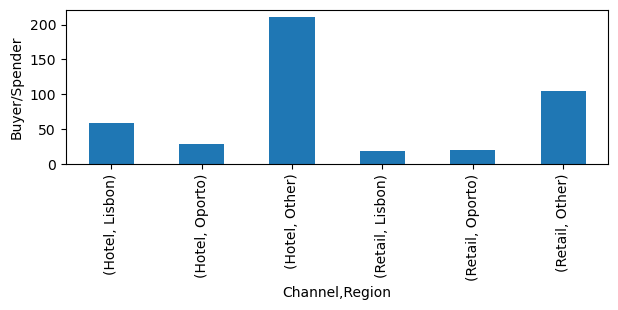

In [90]:
df_grouped = df.groupby(["Channel",'Region'])["Buyer/Spender"].count()
print(df_grouped)
df_grouped.plot(kind="bar", figsize=(7,2))
plt.ylabel('Buyer/Spender')

Channel
Hotel     298
Retail    142
Name: Buyer/Spender, dtype: int64


Text(0, 0.5, 'Buyer/Spender')

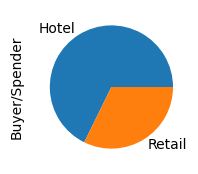

In [91]:
df_grouped1 = df.groupby(["Channel"])["Buyer/Spender"].count()
print(df_grouped1)
df_grouped1.plot(kind="pie", figsize=(7,2))
plt.ylabel('Buyer/Spender')

Region
Lisbon     77
Oporto     47
Other     316
Name: Buyer/Spender, dtype: int64


Text(0, 0.5, 'Buyer/Spender')

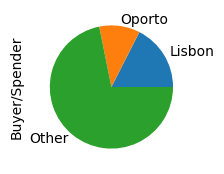

In [92]:
df_grouped2 = df.groupby(['Region'])["Buyer/Spender"].count()
print(df_grouped2)
df_grouped2.plot(kind="pie", figsize=(7,2))
plt.ylabel('Buyer/Spender')

# 1.2 There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [94]:
Retail = df[df['Channel']=='Retail']

In [95]:
Hotel = df[df['Channel']== 'Hotel']

In [96]:
Lisbon = df[df['Region']== 'Lisbon']

In [97]:
Oporto = df[df['Region']== 'Oporto']

In [98]:
Other = df[df['Region']== 'Other']

In [150]:
Retail.describe().T

,count,mean,std,min,25%,50%,75%,max
Buyer/Spender,142.0,183.000000,132.136132,1.0,61.25,166.5,303.75,438.0
Fresh,142.0,8904.323944,8987.714750,18.0,2347.75,5993.5,12229.75,44466.0
Milk,142.0,10716.500000,9679.631351,928.0,5938.00,7812.0,12162.75,73498.0
Grocery,142.0,16322.852113,12267.318094,2743.0,9245.25,12390.0,20183.50,92780.0
Frozen,142.0,1652.612676,1812.803662,33.0,534.25,1081.0,2146.75,11559.0
Detergents_Paper,142.0,7269.507042,6291.089697,332.0,3683.50,5614.5,8662.50,40827.0
Delicatessen,142.0,1753.436620,1953.797047,3.0,566.75,1350.0,2156.00,16523.0


In [141]:
Retail.skew()

Buyer/Spender       0.281986
Fresh               1.593948
Milk                3.413169
Grocery             2.980945
Frozen              2.526896
Detergents_Paper    2.612425
Delicatessen        3.772841
dtype: float64

<AxesSubplot:>

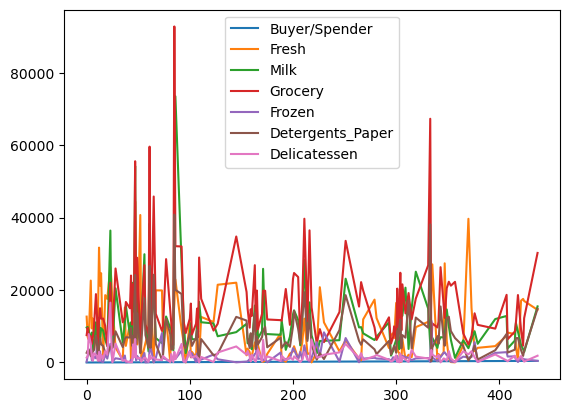

In [176]:
Retail.plot()

In [100]:
Hotel.describe().T

,count,mean,std,min,25%,50%,75%,max
Buyer/Spender,298.0,238.369128,120.910343,4.0,137.25,241.5,344.50,440.0
Fresh,298.0,13475.560403,13831.687502,3.0,4070.25,9581.5,18274.75,112151.0
Milk,298.0,3451.724832,4352.165571,55.0,1164.50,2157.0,4029.50,43950.0
Grocery,298.0,3962.137584,3545.513391,3.0,1703.75,2684.0,5076.75,21042.0
Frozen,298.0,3748.251678,5643.912500,25.0,830.00,2057.5,4558.75,60869.0
Detergents_Paper,298.0,790.560403,1104.093673,3.0,183.25,385.5,899.50,6907.0
Delicatessen,298.0,1415.956376,3147.426922,3.0,379.00,821.0,1548.00,47943.0


In [145]:
Hotel.skew()

Buyer/Spender       -0.077573
Fresh                2.512084
Milk                 4.660186
Grocery              2.118316
Frozen               5.211448
Detergents_Paper     2.857124
Delicatessen        11.521808
dtype: float64

In [156]:
Lisbon.describe().T

,count,mean,std,min,25%,50%,75%,max
Buyer/Spender,77.0,235.000000,22.371857,197.0,216.0,235.0,254.0,273.0
Fresh,77.0,11101.727273,11557.438575,18.0,2806.0,7363.0,15218.0,56083.0
Milk,77.0,5486.415584,5704.856079,258.0,1372.0,3748.0,7503.0,28326.0
Grocery,77.0,7403.077922,8496.287728,489.0,2046.0,3838.0,9490.0,39694.0
Frozen,77.0,3000.337662,3092.143894,61.0,950.0,1801.0,4324.0,18711.0
Detergents_Paper,77.0,2651.116883,4208.462708,5.0,284.0,737.0,3593.0,19410.0
Delicatessen,77.0,1354.896104,1345.423340,7.0,548.0,806.0,1775.0,6854.0


In [157]:
Lisbon.skew()

Buyer/Spender       0.000000
Fresh               2.013077
Milk                1.923527
Grocery             2.023387
Frozen              2.334571
Detergents_Paper    2.359030
Delicatessen        2.050233
dtype: float64

In [102]:
Oporto.describe().T

,count,mean,std,min,25%,50%,75%,max
Buyer/Spender,47.0,317.000000,13.711309,294.0,305.5,317.0,328.5,340.0
Fresh,47.0,9887.680851,8387.899211,3.0,2751.5,8090.0,14925.5,32717.0
Milk,47.0,5088.170213,5826.343145,333.0,1430.5,2374.0,5772.5,25071.0
Grocery,47.0,9218.595745,10842.745314,1330.0,2792.5,6114.0,11758.5,67298.0
Frozen,47.0,4045.361702,9151.784954,131.0,811.5,1455.0,3272.0,60869.0
Detergents_Paper,47.0,3687.468085,6514.717668,15.0,282.5,811.0,4324.5,38102.0
Delicatessen,47.0,1159.702128,1050.739841,51.0,540.5,898.0,1538.5,5609.0


In [158]:
Oporto.skew()

Buyer/Spender       0.000000
Fresh               0.979873
Milk                1.803677
Grocery             3.637678
Frozen              5.492402
Detergents_Paper    3.620133
Delicatessen        2.152210
dtype: float64

In [103]:
Other.describe().T

,count,mean,std,min,25%,50%,75%,max
Buyer/Spender,316.0,202.613924,143.615303,1.0,79.75,158.5,361.25,440.0
Fresh,316.0,12533.471519,13389.213115,3.0,3350.75,8752.5,17406.50,112151.0
Milk,316.0,5977.085443,7935.463443,55.0,1634.00,3684.5,7198.75,73498.0
Grocery,316.0,7896.363924,9537.287778,3.0,2141.50,4732.0,10559.75,92780.0
Frozen,316.0,2944.594937,4260.126243,25.0,664.75,1498.0,3354.75,36534.0
Detergents_Paper,316.0,2817.753165,4593.051613,3.0,251.25,856.0,3875.75,40827.0
Delicatessen,316.0,1620.601266,3232.581660,3.0,402.00,994.0,1832.75,47943.0


In [159]:
Other.skew()

Buyer/Spender        0.327663
Fresh                2.617896
Milk                 4.250869
Grocery              3.839176
Frozen               3.963391
Detergents_Paper     3.705302
Delicatessen        10.214896
dtype: float64

                     Fresh        Milk     Frozen      Grocery  \
Channel Region                                                   
Hotel   Lisbon   717380.25  218195.250  167540.75   237542.000   
        Oporto   326215.00   63411.125   92852.50   123074.000   
        Other   2701258.50  683347.625  612758.50   820101.000   
Retail  Lisbon    93600.00  173082.375   45965.25   291474.375   
        Oporto   138506.00  160251.250   25484.25   261519.625   
        Other   1020370.25  923092.875  158516.50  1450294.000   

                Detergents_Paper  Delicatessen  
Channel Region                                  
Hotel   Lisbon          56081.00      67716.25  
        Oporto          13516.00      29294.25  
        Other          165990.00     243386.25  
Retail  Lisbon         116648.25      30078.50  
        Oporto         117226.25      23541.00  
        Other          583289.75     163338.50  


Text(0, 0.5, 'Items')

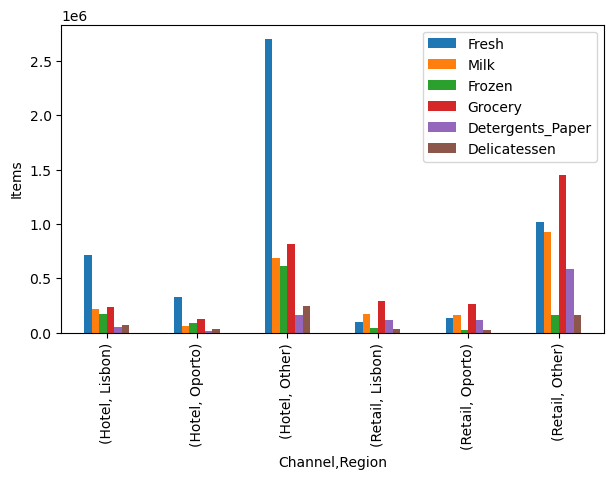

In [192]:
Fresh_items = df.groupby(["Channel",'Region'])[["Fresh",'Milk','Frozen','Grocery','Detergents_Paper','Delicatessen']].sum()
print(Fresh_items)
Fresh_items.plot(kind="bar", figsize=(7,4))
plt.ylabel('Items')

In [104]:
# For Fresh Items

Channel  Region
Hotel    Lisbon     717380.25
         Oporto     326215.00
         Other     2701258.50
Retail   Lisbon      93600.00
         Oporto     138506.00
         Other     1020370.25
Name: Fresh, dtype: float64


Text(0, 0.5, 'Fresh')

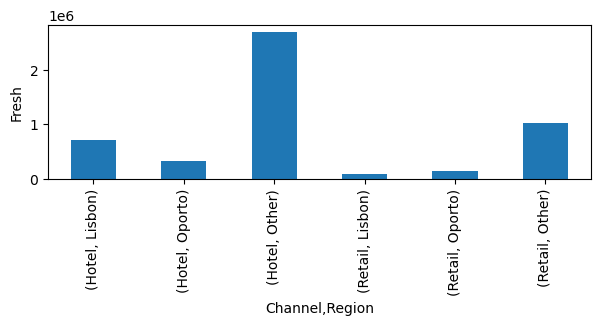

In [181]:
Fresh_items = df.groupby(["Channel",'Region'])["Fresh"].sum()
print(Fresh_items)
Fresh_items.plot(kind="bar", figsize=(7,2))
plt.ylabel('Fresh')

In [106]:
#For Milk

Channel  Region
Hotel    Lisbon    218195.250
         Oporto     63411.125
         Other     683347.625
Retail   Lisbon    173082.375
         Oporto    160251.250
         Other     923092.875
Name: Milk, dtype: float64


Text(0, 0.5, 'Milk')

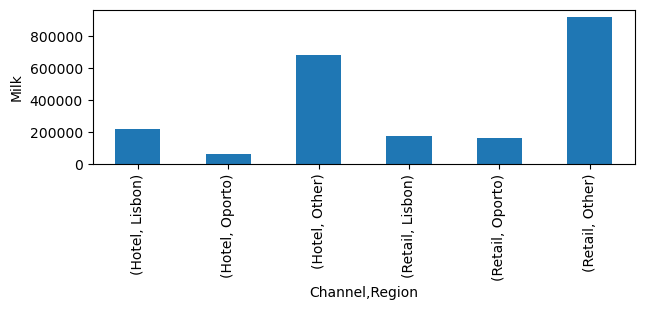

In [182]:
Milk_item = df.groupby(["Channel",'Region'])["Milk"].sum()
print(Milk_item)
Milk_item.plot(kind="bar", figsize=(7,2))
plt.ylabel('Milk')

In [108]:
#For Grocery

Channel  Region
Hotel    Lisbon     237542.000
         Oporto     123074.000
         Other      820101.000
Retail   Lisbon     291474.375
         Oporto     261519.625
         Other     1450294.000
Name: Grocery, dtype: float64


Text(0.5, 0, 'Grocery')

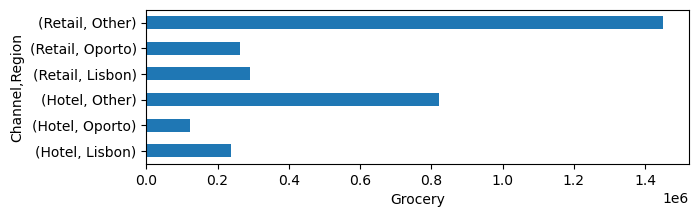

In [183]:
Grocery = df.groupby(["Channel",'Region'])["Grocery"].sum()
print(Grocery)
Grocery.plot(kind ='barh',figsize=(7,2))
plt.xlabel('Grocery')

In [110]:
# For Frozen

Channel  Region
Hotel    Lisbon    167540.75
         Oporto     92852.50
         Other     612758.50
Retail   Lisbon     45965.25
         Oporto     25484.25
         Other     158516.50
Name: Frozen, dtype: float64


<AxesSubplot:ylabel='Frozen'>

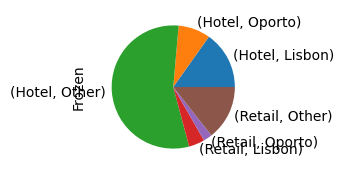

In [184]:
Frozen_item = df.groupby(["Channel",'Region'])["Frozen"].sum()
print(Frozen_item)
Frozen_item.plot(kind ='pie',figsize=(7,2))
#plt.xlabel('Frozen')

In [112]:
# for Detergents_Paper

Channel  Region
Hotel    Lisbon     56081.00
         Oporto     13516.00
         Other     165990.00
Retail   Lisbon    116648.25
         Oporto    117226.25
         Other     583289.75
Name: Detergents_Paper, dtype: float64


Text(0.5, 0, 'Detergents_Paper')

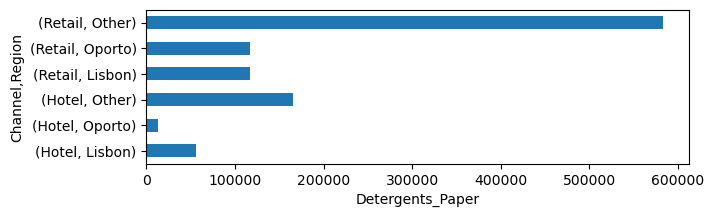

In [185]:
Detergents_Paper = df.groupby(["Channel",'Region'])["Detergents_Paper"].sum()
print(Detergents_Paper)
Detergents_Paper.plot(kind ='barh',figsize=(7,2))
plt.xlabel('Detergents_Paper')

In [114]:
# for Delicatessen

Channel  Region
Hotel    Lisbon     67716.25
         Oporto     29294.25
         Other     243386.25
Retail   Lisbon     30078.50
         Oporto     23541.00
         Other     163338.50
Name: Delicatessen, dtype: float64


Text(0.5, 0, 'Delicatessen')

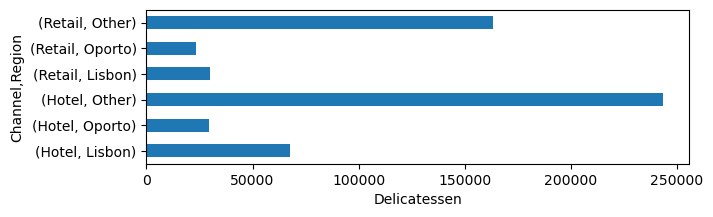

In [186]:
Delicatessen = df.groupby(["Channel",'Region'])["Delicatessen"].sum()
print(Delicatessen)
Delicatessen.plot(kind ='barh',figsize=(7,2))
plt.xlabel('Delicatessen')

# 1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

In [116]:
#define function to calculate cv
cv = lambda x: np.std(x, ddof=1) / np.mean(x) * 100 

In [118]:
df_num_var = df.drop(['Channel','Region','Buyer/Spender'],axis = 1)
df_num_var.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [167]:
df_num_var.apply(cv)

Fresh               105.391792
Milk                127.329858
Grocery             119.517437
Frozen              158.033238
Detergents_Paper    165.464714
Delicatessen        184.940690
dtype: float64

# 1.4 Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.

In [120]:
df_num = df.drop(['Channel','Region'],axis = 1)
df_num.head()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,12669,9656,7561,214,2674,1338
1,2,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
3,4,13265,1196,4221,6404,507,1788
4,5,22615,5410,7198,3915,1777,5185


In [121]:
df_cat = df[['Channel','Region']]
df_cat.head()

,Channel,Region
0,Retail,Other
1,Retail,Other
2,Retail,Other
3,Hotel,Other
4,Retail,Other


Buyer/Spender
Skew : 0.0


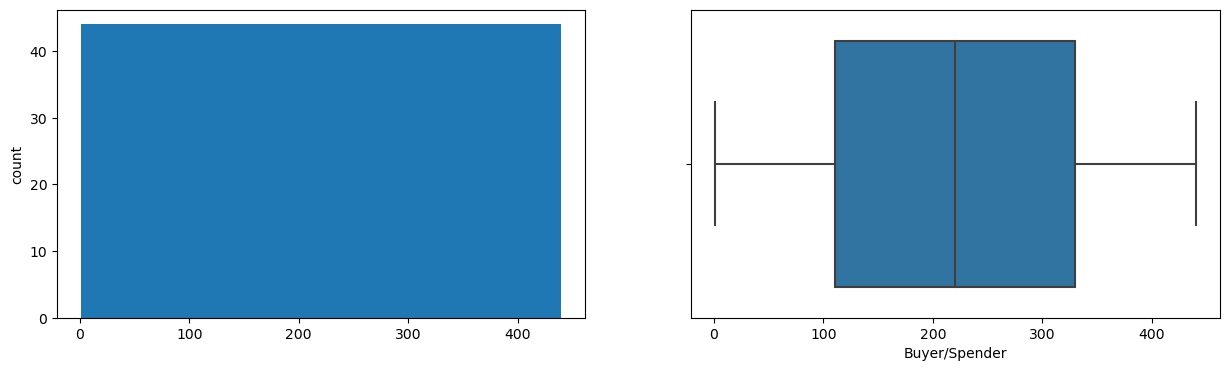

Fresh
Skew : 2.56


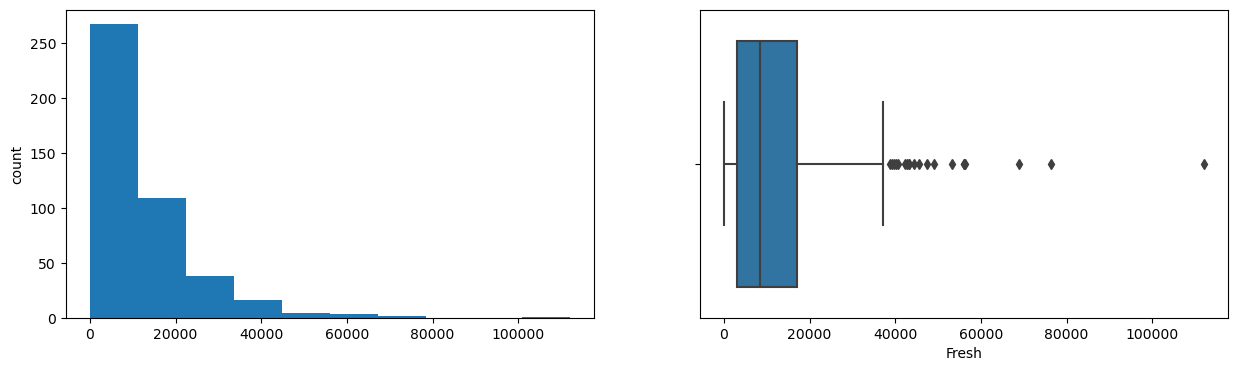

Milk
Skew : 4.05


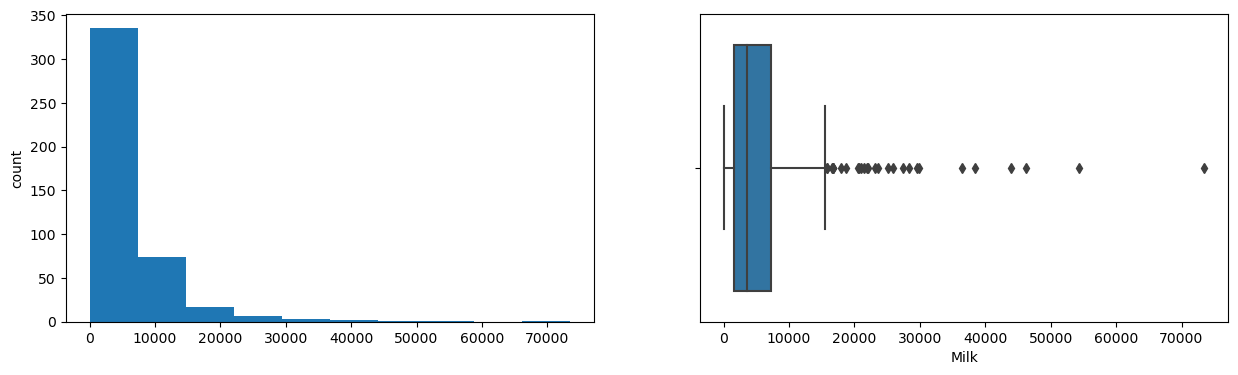

Grocery
Skew : 3.59


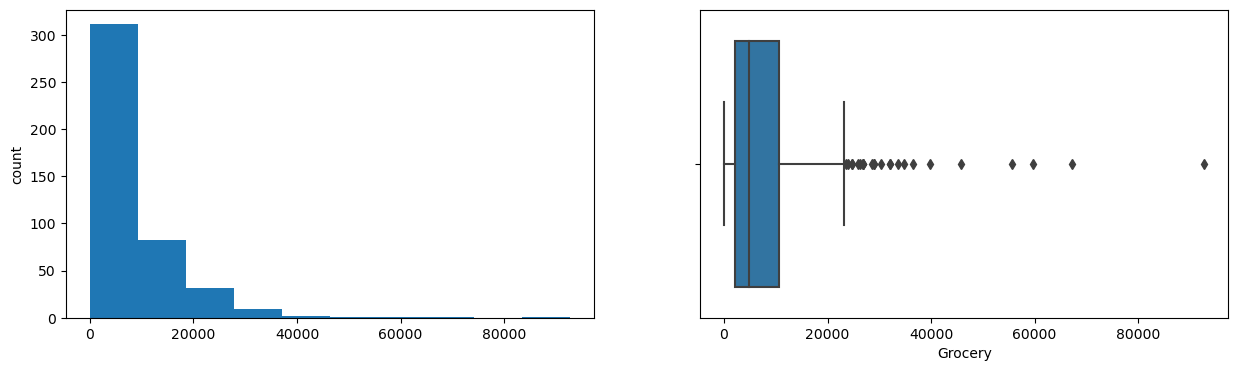

Frozen
Skew : 5.91


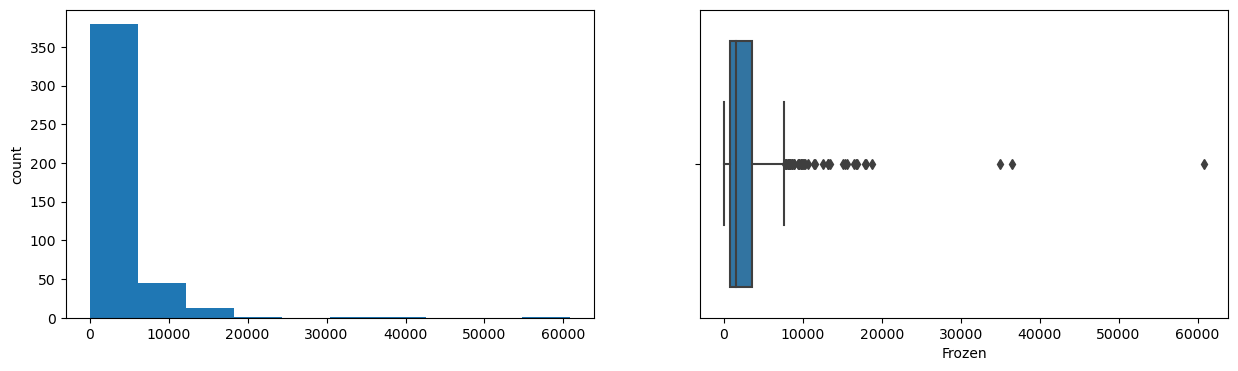

Detergents_Paper
Skew : 3.63


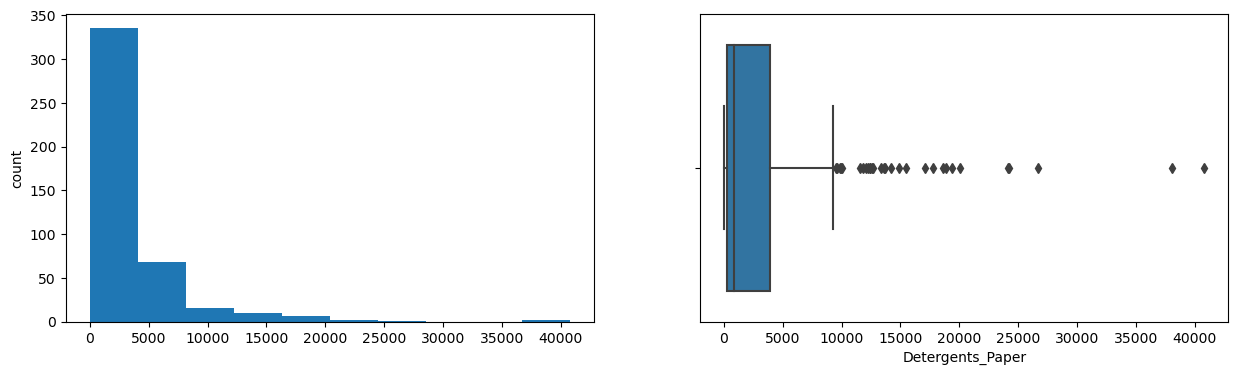

Delicatessen
Skew : 11.15


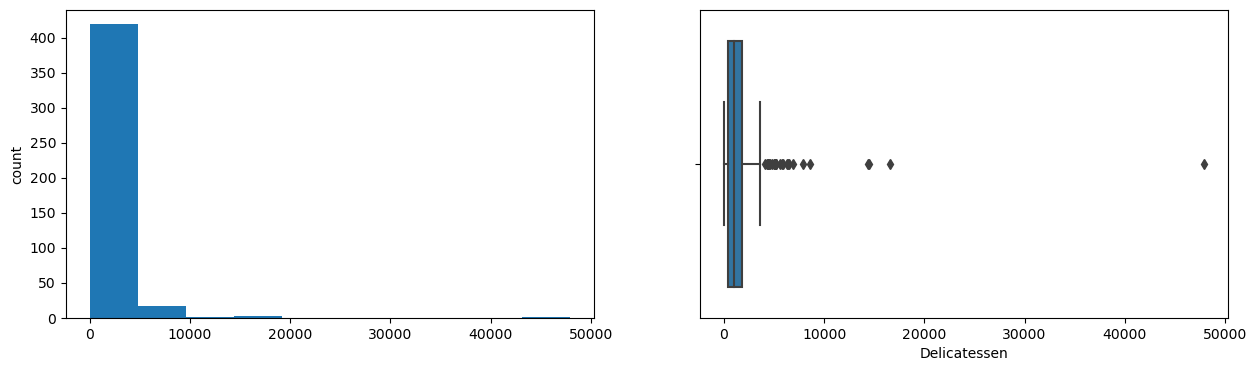

In [122]:
for col in df_num.columns[:]:
    print(col)
    print('Skew :',round(df_num[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    df_num[col].hist(bins=10,grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=df_num[col])
    plt.show()

In [123]:
#Treating Outliers

In [124]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [125]:
for column in df_num.columns[:]:
    lr,ur=remove_outlier(df_num[column])
    df_num[column]=np.where(df_num[column]>ur,ur,df_num[column])
    df_num[column]=np.where(df_num[column]<lr,lr,df_num[column])
    plt.show()
    print(column)

Buyer/Spender
Fresh
Milk
Grocery
Frozen
Detergents_Paper
Delicatessen


In [126]:
#Checking if outliers are treated or not

Buyer/Spender
Skew : 0.0


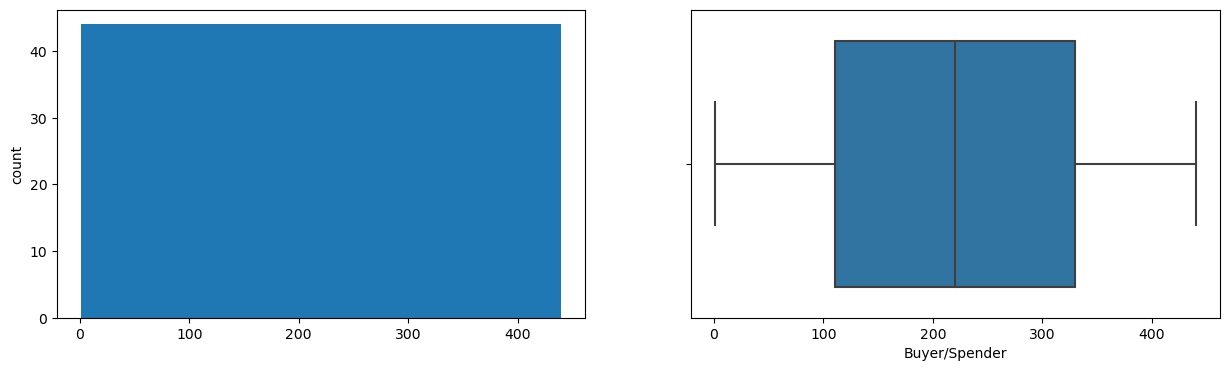

Fresh
Skew : 1.11


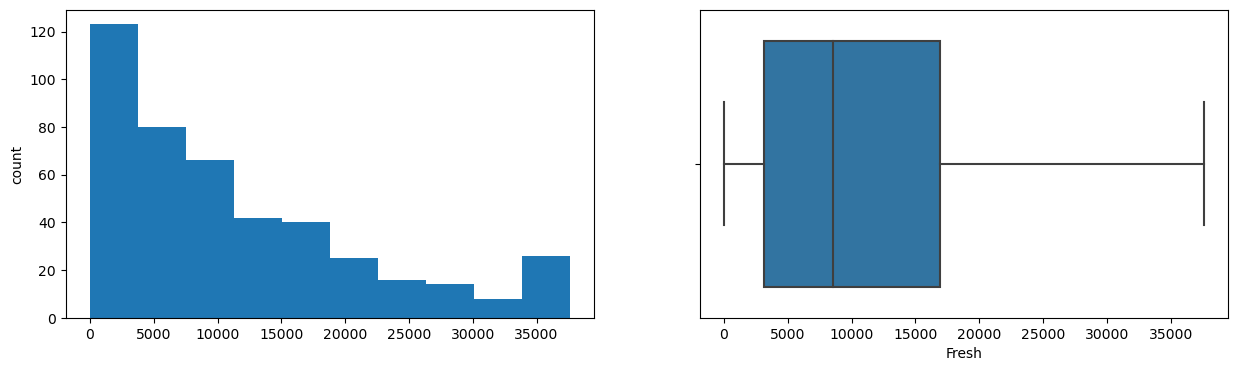

Milk
Skew : 1.11


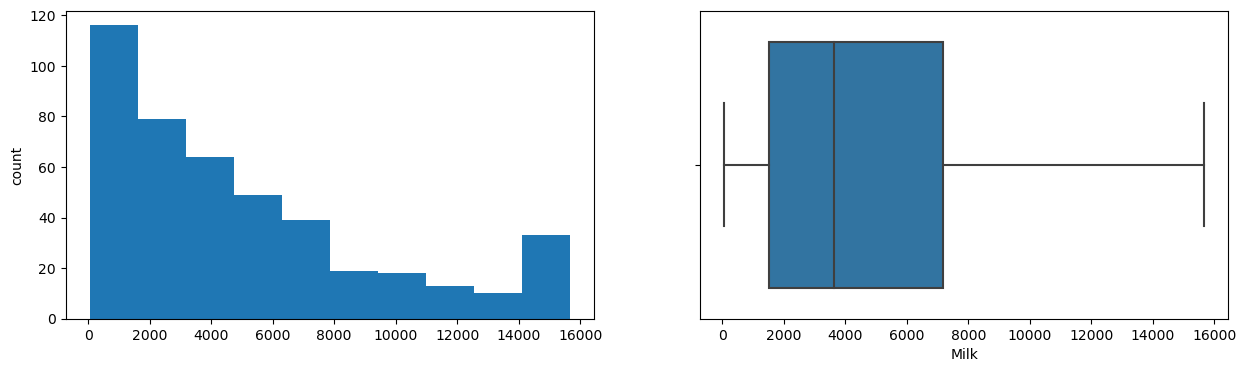

Grocery
Skew : 1.18


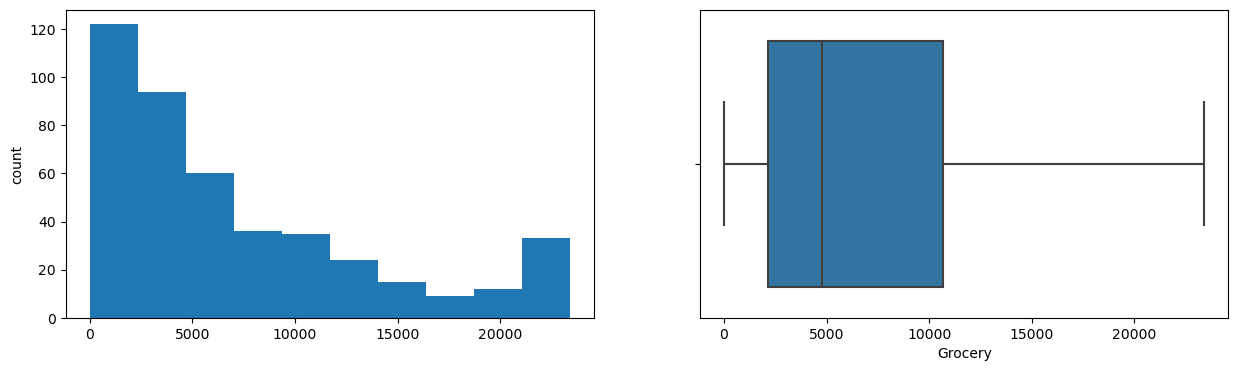

Frozen
Skew : 1.12


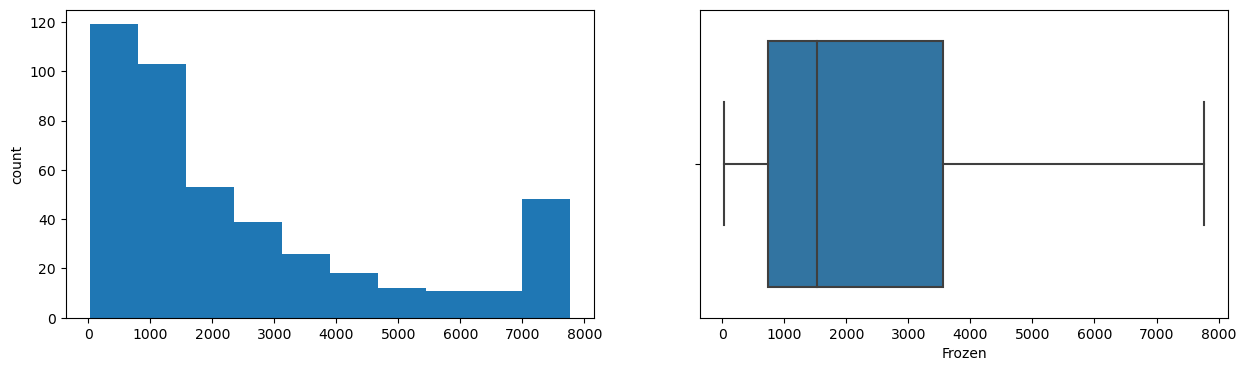

Detergents_Paper
Skew : 1.27


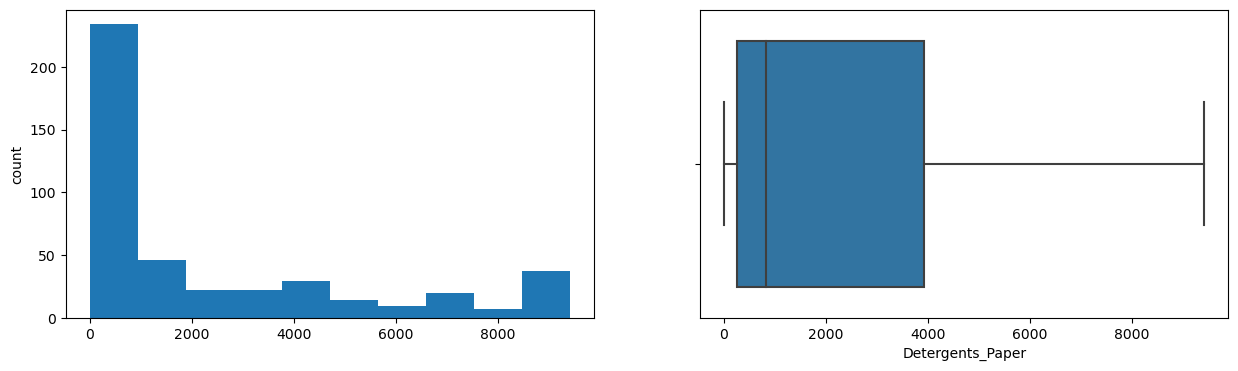

Delicatessen
Skew : 1.07


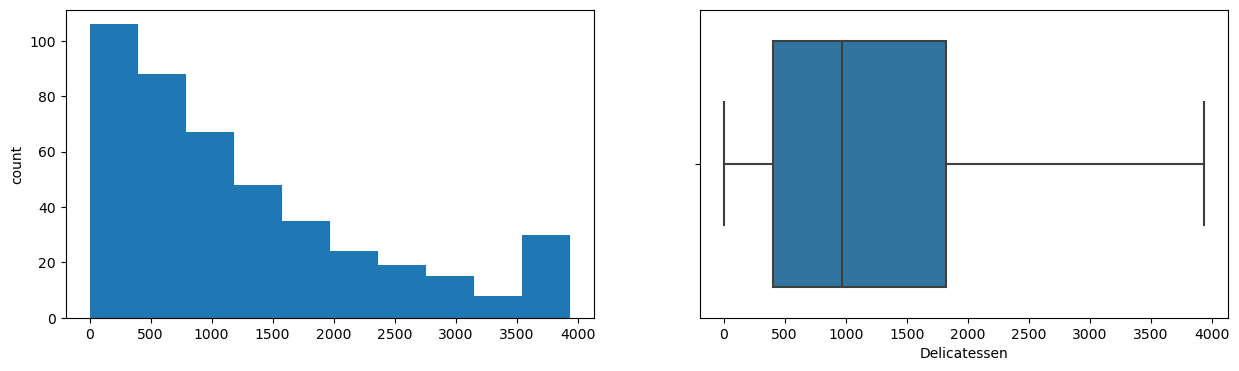

In [127]:
for col in df_num.columns[:]:
    print(col)
    print('Skew :',round(df_num[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    df_num[col].hist(bins=10,grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=df_num[col])
    plt.show()

In [128]:
df_cat.head()

,Channel,Region
0,Retail,Other
1,Retail,Other
2,Retail,Other
3,Hotel,Other
4,Retail,Other


In [168]:
df_new = pd.concat([df_num, df_cat], axis=1, join='inner')
df_new.head()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Channel,Region
0,1.0,12669.0,9656.0,7561.0,214.0,2674.0,1338.00,Retail,Other
1,2.0,7057.0,9810.0,9568.0,1762.0,3293.0,1776.00,Retail,Other
2,3.0,6353.0,8808.0,7684.0,2405.0,3516.0,3938.25,Retail,Other
3,4.0,13265.0,1196.0,4221.0,6404.0,507.0,1788.00,Hotel,Other
4,5.0,22615.0,5410.0,7198.0,3915.0,1777.0,3938.25,Retail,Other


In [130]:
df_new.shape

(440, 9)

In [131]:
df = df_new

In [132]:
df.head()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Channel,Region
0,1.0,12669.0,9656.0,7561.0,214.0,2674.0,1338.00,Retail,Other
1,2.0,7057.0,9810.0,9568.0,1762.0,3293.0,1776.00,Retail,Other
2,3.0,6353.0,8808.0,7684.0,2405.0,3516.0,3938.25,Retail,Other
3,4.0,13265.0,1196.0,4221.0,6404.0,507.0,1788.00,Hotel,Other
4,5.0,22615.0,5410.0,7198.0,3915.0,1777.0,3938.25,Retail,Other
